## Assignment 3

In [ ]:

import pandas as pd
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Reads in iris.txt into a data frame

In [37]:

def readfile():#this reads in the data and creates 2 global vairables to be used in other functions
    global filename #lets the file name be used as a global variable
    global file #let's the pd.read_csv be called as file to reduce future typing
    filename = 'iris.txt'
    file = pd.read_csv(filename)

# Prints Heads/Tails and summary statistics

In [38]:


# This function prints the top and bottom rows and summary statistics for the data set
def sumstats():
    readfile() #pulls in the readfile function to reduce typing
    print(file.head(), #prints the top 5 rows
          file.tail(), #prints the bottom 5 rows
          file.describe(include = ['object', 'float']), #creates a set of summary statistics including count, mean, standard dev, min, quartiles, and max
          sep = "\n")

sumstats()

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica
        SepalLength  SepalWidth  PetalLength  PetalWidth      Species
count    150.000000  150.000000   150.000000  150.000000          150
unique          NaN         NaN          NaN      

# Head, tail, and summary statistics interpretations
Looking at only the head and tail of the data set does not provide much insight. With the species setosa on top and virginica on bottom it looks as though the data is ordered alphabetically by species. Reviewing the summary statistics, it looks as the sepal length and the sepal width are pretty uniform across the species with low standard deviations compared to the expected value of each. However, the petal length and pedal width relitively high standard deviations in relation to their expected value implying larger variation in lengths and widths between species

# Generates boxplot for sepal length, sepal width, petal length, and petal width

C:\Users\Esteban\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


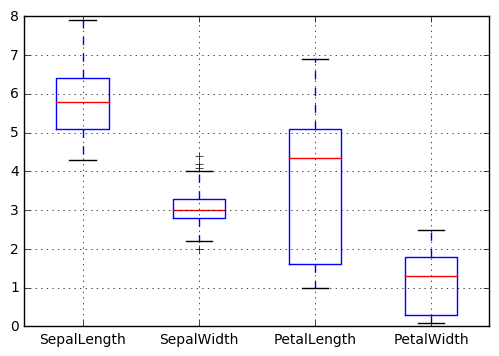

In [39]:
def box():
    readfile()
    file.boxplot()
    
box()
    

# Interpretation of box plots
As stated in the sum stats interp. Sepal measurements seem to have less variation than the petal measurements. Because of this their mean is closer to the middle of the boxes and their boxes are smaller (less variation). Also there seems to be more outliers on the upper limits of the measurements than the lower. This seems to implies that the most "extreme" variation tends to be a larger flower than a smaller one.

# Generate a line plot for the data set

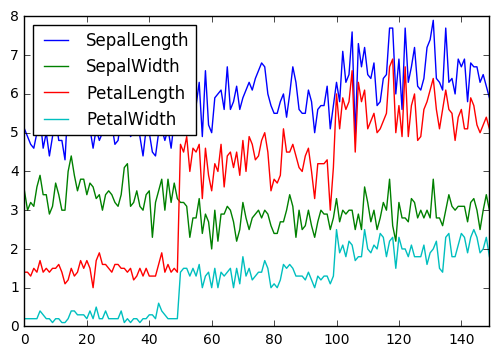

In [40]:
file.plot()#generates a line plot for the combined dataset


# interpretation of line plot
With this graph you can CLEARLY see the jump between species for petal length and wide. The jump happens at the 50 unit marks in the data and since each of the species has a sample count of 50 it is relitively safe to assume that these jumps where one species ends and the data for the next species begins.

# Genertates a histogram for the dataset

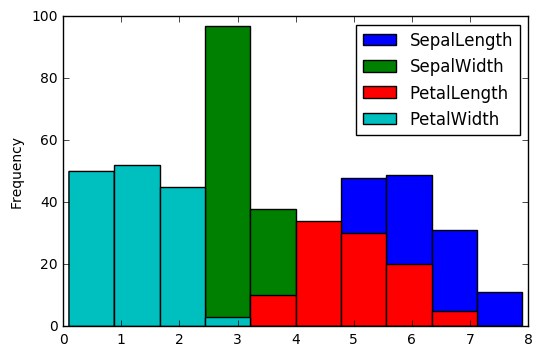

In [41]:
file.plot.hist()

# Interpretation of Histogram
It also shows how concentrated the sepal widths are, with almost 2/3rds being roughly between 2.5 and 3 units of measurements. Pedal width is slightly more varied but is still pretty concentracted into the 3 main groups. The petal length and the sepal legnth seem to have a very similair distribution, which would make since considering the two measurements are usually proportional to the size of the flower.  

## Generate summary statistics for each species

In [43]:
print(file.groupby('Species').describe(include = ['object', 'float']))#groups into subsets by 'Species' then provides summary statistics 

                       PetalLength  PetalWidth  SepalLength  SepalWidth
Species                                                                
Iris-setosa     count    50.000000   50.000000    50.000000   50.000000
                mean      1.464000    0.244000     5.006000    3.418000
                std       0.173511    0.107210     0.352490    0.381024
                min       1.000000    0.100000     4.300000    2.300000
                25%       1.400000    0.200000     4.800000    3.125000
                50%       1.500000    0.200000     5.000000    3.400000
                75%       1.575000    0.300000     5.200000    3.675000
                max       1.900000    0.600000     5.800000    4.400000
Iris-versicolor count    50.000000   50.000000    50.000000   50.000000
                mean      4.260000    1.326000     5.936000    2.770000
                std       0.469911    0.197753     0.516171    0.313798
                min       3.000000    1.000000     4.900000    2

# interpretation of sum stats grouped by species
Breaking the data up by species and then looking at the summary statistics seems to show the petal measurements are more distinct between species than the sepal measurements. You can see the that each of the expected values for petal measurements are more than 2 standard deviations away from the expected value of the next closest species, but the expected values for the sepal measurements tend to be within 2 standard deviations away from from the next closest species.
Also the Setosa tends to be the smallest flower and the Virginica tends to be the largest.

## Group by species and generate a box plot for each of the species

C:\Users\Esteban\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


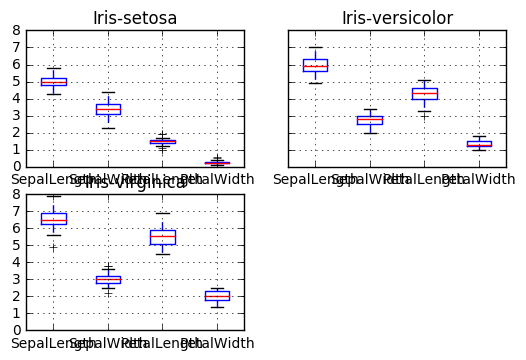

In [60]:
file.groupby('Species').boxplot()
plt.show()#makes plot appear

# interpretation of box plots grouped by species
Something that this graph illustrates better than the previous visualizations is the difference in pedal and sepal sizes for each plant. You can cleary see that while none of the flowers have pedals on that are (on average) the same size as the sepals, the virginica (bottom) is much closer than the setosa (top left).

# Generate a scattermatrix for the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D039630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7CAC18>]], dtype=object)

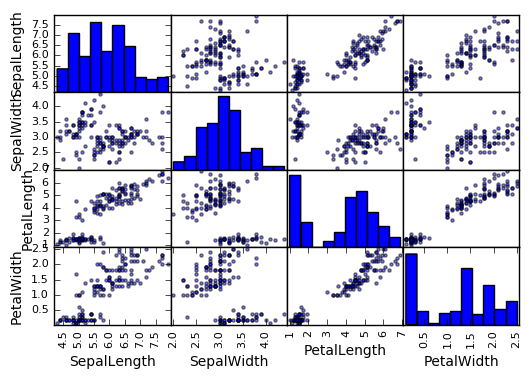

In [62]:
scatter_matrix(file)#creates a scatter matrix from the iris data using the variable name file that has been set to equal pandas.read_csv('iris.txt')

# Interpretation of the scatter matrix
When sepal length and width are paired up the plots with two rough clusters. When a sepal and a pedal measurement are paired up there are still two rough clusters of points, but the smaller cluster is roughly one third the other cluster and is obviously the setosa measurements due to their location on the bottom left of the plot (indicating smaller total size). You can also see that the sepals have a distribution closer to a normal distribution than the petal measurments.

# Problem 4
Petal length and petal width are the two variables that can be used to predict species. For each species those two variables are atleast 2 standard deviations away from the same variable of the closest species. 

